In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import gensim
from io import StringIO

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D,MaxPooling1D,Flatten
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_fake = pd.read_csv ('/content/drive/MyDrive/Datasets/BanglaFakeNews/ReadyData/complete_fake_all.csv')
df_true = pd.read_csv ('/content/drive/MyDrive/Datasets/BanglaFakeNews/ReadyData/complete_Authentic.csv')

In [ ]:
auth = df_true
fake = df_fake

# **Clean Datasets**

In [ ]:
fake = fake.loc[:, ~fake.columns.str.contains('^Unnamed')]
auth = auth.loc[:, ~auth.columns.str.contains('^Unnamed')]

In [ ]:
auth.head(10)

,articleID,domain,date,category,headline,content,label,scrap_date
0,620001,https://www.ittefaq.com.bd/,2022-11-11T10:50:00+06:00,unknown,বুয়েটছাত্র ফারদিন হত্যাকাণ্ডের তদন্তে মোড়,বাংলাদেশ প্রকৌশল বিশ্ববিদ্যালয়ের বুয়েট ছাত্র ফ...,1,01-02-2023
1,620002,https://www.ittefaq.com.bd/,2022-11-11T10:57:11+06:00,unknown,রাজদায়িত্ব ছেড়ে নরওয়ের রাজকুমারী,রাজদায়িত্ব ছেড়ে দিয়েছেন নরওয়ের রাজকুমারী মার্থ...,1,01-02-2023
2,620004,https://www.ittefaq.com.bd/,2022-11-11T11:20:13+06:00,unknown,সাড়ে ৫২ টন গম চট্টগ্রাম বন্দরে ইউক্রেনের ‘ম্যা...,সাড়ে ৫২ টন গম ইউক্রেনের ‘ম্যাগনাম ফরচুন’ জাহাজ...,1,01-02-2023
3,620005,https://www.ittefaq.com.bd/,2022-11-11T11:38:50+06:00,unknown,মিমের স্ক্রিনশট ফাঁস পরীমণি,ঢাকাই সিনেমার সময়ের জনপ্রিয় চিত্রনায়িকা পরীমণি...,1,01-02-2023
4,620007,https://www.ittefaq.com.bd/,2022-11-11T11:50:11+06:00,unknown,বিশ্বের বৃহত্তম বাণিজ্যিক উড়োজাহাজ পুনর্নির্মাণের,ইউক্রেনে রাশিয়ার হামলায় বিশ্বের সবচেয়ে বড় বাণি...,1,01-02-2023
5,620008,https://www.ittefaq.com.bd/,2022-11-11T12:17:02+06:00,unknown,মূল্যবৃদ্ধির পরও বাজারে দিয়েছে সয়াবিন সংকট,দাম বৃদ্ধির নিত্যপণ্যের বাজারে সয়াবিন তেলের সং...,1,01-02-2023
6,620009,https://www.ittefaq.com.bd/,2022-11-11T12:37:01+06:00,unknown,দিনে ৩০ জান্তা সেনাকে হত্যা,পিপলস ডিফেন্স ফোর্স পিডিএফ এথনিক আর্মড অর্গানা...,1,01-02-2023
7,620010,https://www.ittefaq.com.bd/,2022-11-11T12:42:10+06:00,unknown,চট্টগ্রামে পিকনিকের বাস উল্টে নিহত ২,চট্টগ্রামের লোহাগাড়ার চুনতি এলাকায় পিকনিকের বা...,1,01-02-2023
8,620012,https://www.ittefaq.com.bd/,2022-11-11T13:11:08+06:00,unknown,সড়কে দাঁড়িয়ে ট্রাকের পেছনে চলতি ট্রাকের ধাক্কা...,ঝিনাইদহে সদরের হাটগোপালপুর এলাকায় ট্রাকের পেছন...,1,01-02-2023
9,620013,https://www.ittefaq.com.bd/,2022-11-11T13:24:40+06:00,unknown,সবকিছু লিভিং রুমে পরীমণি,বুধবার ৯ নভেম্বর দিবারাত সোয়া ২টার চিত্রনায়িকা...,1,01-02-2023


In [ ]:
fake.head(10)

,articleID,domain,date,category,headline,content,label,verified by,scrap_date
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,Unknown,Not Found
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,Unknown,Not Found
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,Unknown,Not Found
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,Unknown,Not Found
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,Unknown,Not Found
5,6,channeldhaka.news,2018-12-24T18:17:50+00:00,Miscellaneous,বিয়ের পিড়িতে বসছেন মিয়া খলিফা ! ছেলে কুমিল্লার,বিয়ের সানাই বাজতে চলেছে শীঘ্রই ! সব জল্পনা কল...,0,Unknown,Not Found
6,7,earki.com,2019-03-14T02:33:32+00:00,Miscellaneous,জুম্মার নামাজে সবচেয়ে বেশি মসজিদে যায় নোয়াখ...,"এক গবেষণা থেকে জানা গেছে, বাংলাদেশের অন্যান্য ...",0,Unknown,Not Found
7,8,motikontho.wordpress.com,2011-06-19T07:12:21+00:00,Miscellaneous,প্রধানমন্ত্রীর প্রশ্ন: আমনে আমাত্তে বড় দেশপ্রে...,নিজস্ব মতিবেদকতেল-গ্যাস-খনিজ সম্পদ ও বিদ্যুৎ-ব...,0,Unknown,Not Found
8,10,bengaliviralnews.com,2018-01-03T17:21:14+00:00,Miscellaneous,জানেন শিব ঠাকুরের বাবা কে ? জেনে নিন তাহলে... -,তেত্রিশ কোটি দেবতার মধ্যে এক-একজন এক-এক বেশে এ...,0,Unknown,Not Found
9,11,motikontho.wordpress.com,2015-02-22T14:45:30+00:00,Miscellaneous,মেডামের দুয়ায় সমস্যা আছে: মিছবাউল | দৈনিক মতিকণ্ঠ,ক্রীড়া মতিবেদকচলমান বিশ্বকাপ কৃকেটে পাকিস্তানে...,0,Unknown,Not Found


In [ ]:
display(fake.iloc[1489])

articleID                                                    321
domain                                                   unknown
date                                                  01/30/2023
category                                                 unknown
headline       এই গাছটির কারণে অসুস্থ হয়ে পড়তে পারেন আপনি, এম...
content        গাছটি খুব পরিচিত ।অফিস, স্কুল বা বাড়িতে শখ করে...
label                                                          0
verified by                              https://www.boombd.com/
scrap_date                                             Not Found
Name: 1489, dtype: object

In [ ]:
display(auth.iloc[4949])

articleID                                                667860
domain                         https://www.dailyjanakantha.com/
date                           প্রকাশিত: ১৬:২৪, ২৯ অক্টোবর ২০২২
category                                                unknown
headline                               বুকওয়ার্মকে ছাড়তে ঠিকানা
content       বিচিত্র বইয়ের সংগ্রহ রাজধানীর বুকওয়ার্ম বয়সী প...
label                                                         1
scrap_date                                           03-02-2023
Name: 4949, dtype: object

In [ ]:
fake = fake.drop(['verified by'], axis=1)

In [ ]:
empty_real_index = [index for index,text in enumerate(auth.content.tolist()) if str(text).strip()==""]
auth.iloc[empty_real_index]

,articleID,domain,date,category,headline,content,label,scrap_date
9003,1842,kalerkantho.com,2018-09-20 00:26:32,Sports,সুপার ফোরের সূচি,,1,Unknown


In [ ]:
empty_real_index

[9003]

In [ ]:
auth = auth.drop(empty_real_index,axis=0)

In [ ]:
auth.isnull().sum()
auth=auth.dropna()

In [ ]:
empty_fake_index = [index for index,text in enumerate(fake.content.tolist()) if str(text).strip()==""]
fake.iloc[empty_fake_index]

,articleID,domain,date,category,headline,content,label,scrap_date


In [ ]:
empty_fake_index

[]

In [ ]:
fake = fake.drop(empty_fake_index,axis=0)

In [ ]:
fake.isnull().sum()
fake=fake.dropna()

In [ ]:
auth.shape, fake.shape

((53150, 8), (10276, 8))

In [ ]:
def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column[:top].plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.distplot(column)
  plt.show()

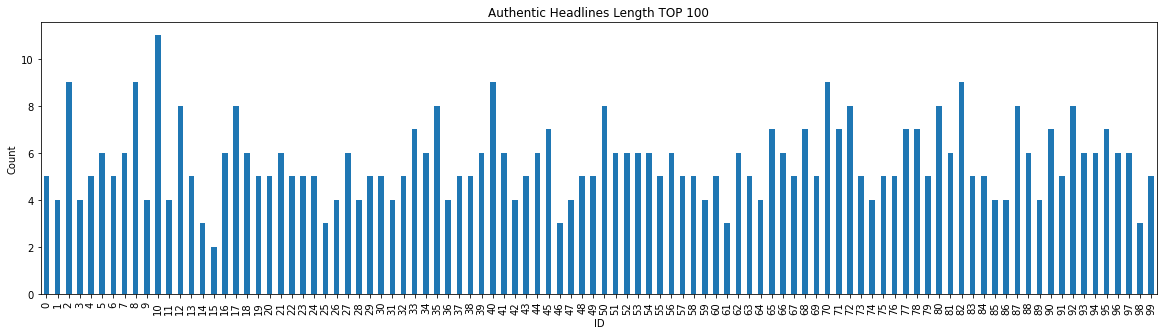

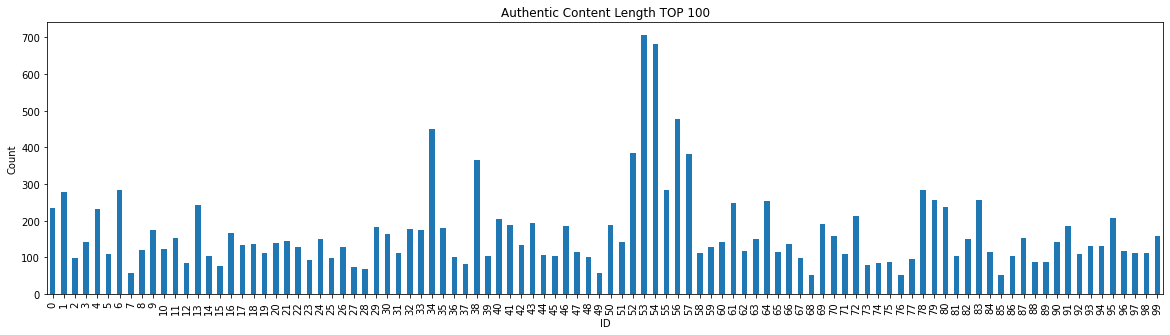

In [ ]:
auth['head_lenght'] = auth.headline.apply(lambda x : len(x.split()))
auth['content_head_lenght'] = auth.content.apply(lambda x : len(x.split()))


show_bar(auth.head_lenght, "Authentic Headlines Length TOP 100")
print("")
show_bar(auth.content_head_lenght, "Authentic Content Length TOP 100")

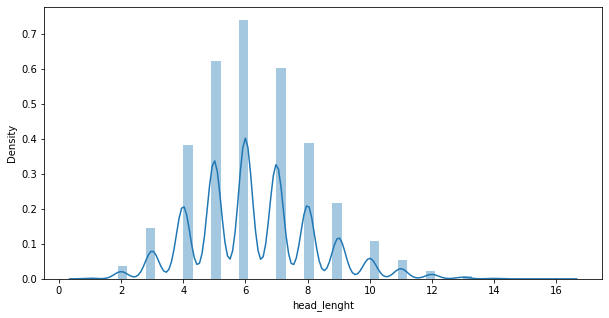

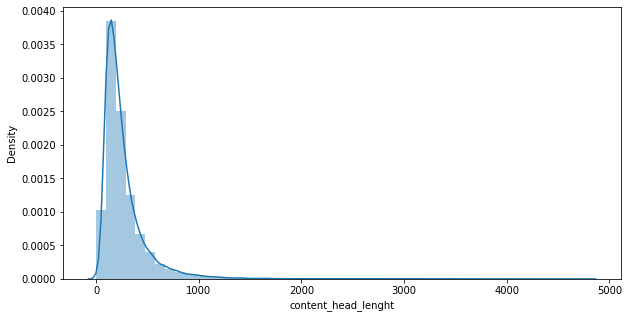

In [ ]:
show_dist(auth.head_lenght)
print("")
show_dist(auth.content_head_lenght)

In [ ]:
auth.head(5)

,articleID,domain,date,category,headline,content,label,scrap_date,head_lenght,content_head_lenght
0,620001,https://www.ittefaq.com.bd/,2022-11-11T10:50:00+06:00,unknown,বুয়েটছাত্র ফারদিন হত্যাকাণ্ডের তদন্তে মোড়,বাংলাদেশ প্রকৌশল বিশ্ববিদ্যালয়ের বুয়েট ছাত্র ফ...,1,01-02-2023,5,234
1,620002,https://www.ittefaq.com.bd/,2022-11-11T10:57:11+06:00,unknown,রাজদায়িত্ব ছেড়ে নরওয়ের রাজকুমারী,রাজদায়িত্ব ছেড়ে দিয়েছেন নরওয়ের রাজকুমারী মার্থ...,1,01-02-2023,4,277
2,620004,https://www.ittefaq.com.bd/,2022-11-11T11:20:13+06:00,unknown,সাড়ে ৫২ টন গম চট্টগ্রাম বন্দরে ইউক্রেনের ‘ম্যা...,সাড়ে ৫২ টন গম ইউক্রেনের ‘ম্যাগনাম ফরচুন’ জাহাজ...,1,01-02-2023,9,97
3,620005,https://www.ittefaq.com.bd/,2022-11-11T11:38:50+06:00,unknown,মিমের স্ক্রিনশট ফাঁস পরীমণি,ঢাকাই সিনেমার সময়ের জনপ্রিয় চিত্রনায়িকা পরীমণি...,1,01-02-2023,4,141
4,620007,https://www.ittefaq.com.bd/,2022-11-11T11:50:11+06:00,unknown,বিশ্বের বৃহত্তম বাণিজ্যিক উড়োজাহাজ পুনর্নির্মাণের,ইউক্রেনে রাশিয়ার হামলায় বিশ্বের সবচেয়ে বড় বাণি...,1,01-02-2023,5,231


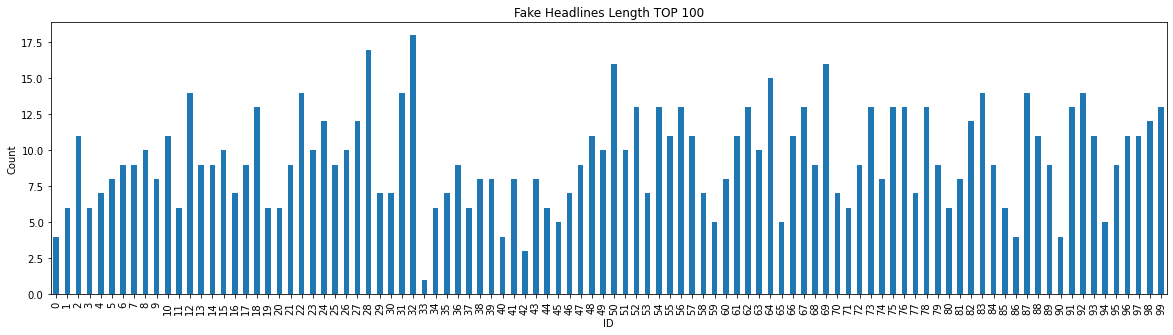

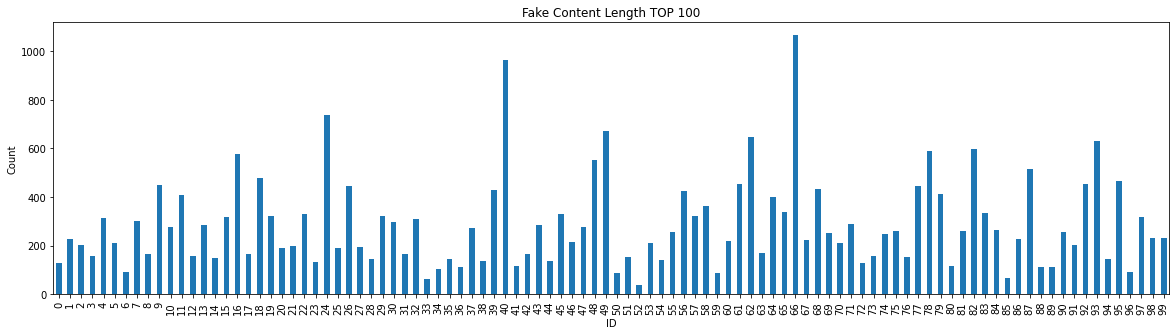

In [ ]:
fake['head_lenght'] = fake.headline.apply(lambda x : len(x.split()))
fake['content_head_lenght'] = fake.content.apply(lambda x : len(x.split()))

show_bar(fake.head_lenght, "Fake Headlines Length TOP 100")
print("")
show_bar(fake.content_head_lenght, "Fake Content Length TOP 100")

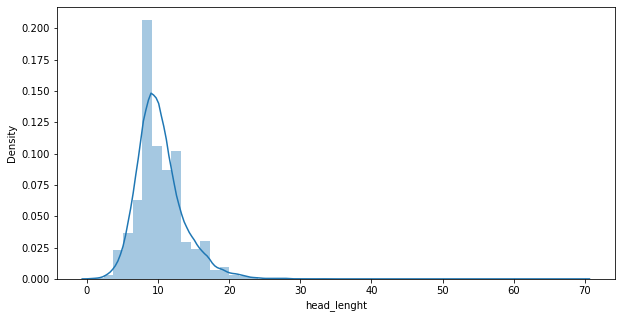

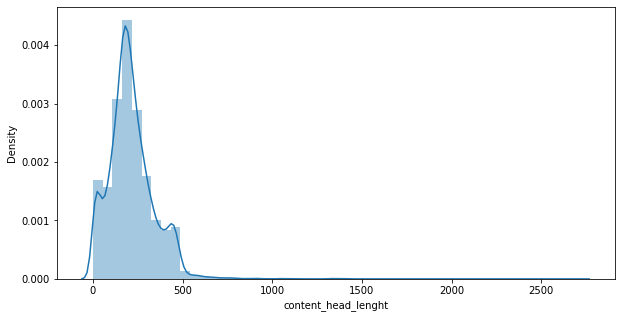

In [ ]:
show_dist(fake.head_lenght)
print("")
show_dist(fake.content_head_lenght)

In [ ]:
df_fake = fake
df_true = auth
df_fake["class"]=0
df_true["class"]=1

In [ ]:
df_true.shape, df_fake.shape

((53150, 9), (10276, 9))

In [ ]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(11367, 11467, -1):
  df_fake.drop([i],axis=0,inplace=True)

df_true_manual_testing = df_true.tail(10)
for i in range(56031, 56131, -1):
  df_true.drop([i],axis=0,inplace=True)

In [ ]:
df_marge = pd.concat([df_fake, df_true], axis=0)
df_marge.head(10)

,articleID,domain,date,category,headline,content,label,scrap_date,class
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,Not Found,0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,Not Found,0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,Not Found,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,Not Found,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,Not Found,0
5,6,channeldhaka.news,2018-12-24T18:17:50+00:00,Miscellaneous,বিয়ের পিড়িতে বসছেন মিয়া খলিফা ! ছেলে কুমিল্লার,বিয়ের সানাই বাজতে চলেছে শীঘ্রই ! সব জল্পনা কল...,0,Not Found,0
6,7,earki.com,2019-03-14T02:33:32+00:00,Miscellaneous,জুম্মার নামাজে সবচেয়ে বেশি মসজিদে যায় নোয়াখ...,"এক গবেষণা থেকে জানা গেছে, বাংলাদেশের অন্যান্য ...",0,Not Found,0
7,8,motikontho.wordpress.com,2011-06-19T07:12:21+00:00,Miscellaneous,প্রধানমন্ত্রীর প্রশ্ন: আমনে আমাত্তে বড় দেশপ্রে...,নিজস্ব মতিবেদকতেল-গ্যাস-খনিজ সম্পদ ও বিদ্যুৎ-ব...,0,Not Found,0
8,10,bengaliviralnews.com,2018-01-03T17:21:14+00:00,Miscellaneous,জানেন শিব ঠাকুরের বাবা কে ? জেনে নিন তাহলে... -,তেত্রিশ কোটি দেবতার মধ্যে এক-একজন এক-এক বেশে এ...,0,Not Found,0
9,11,motikontho.wordpress.com,2015-02-22T14:45:30+00:00,Miscellaneous,মেডামের দুয়ায় সমস্যা আছে: মিছবাউল | দৈনিক মতিকণ্ঠ,ক্রীড়া মতিবেদকচলমান বিশ্বকাপ কৃকেটে পাকিস্তানে...,0,Not Found,0


In [ ]:
df_marge['content'] = df_marge['headline']+" "+df_marge['content']

In [ ]:
data = df_marge[['content', 'class']]

# **Data Chart**

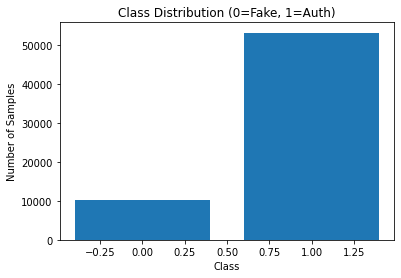

In [ ]:
import matplotlib.pyplot as plt
class_counts = data['class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution (0=Fake, 1=Auth)')
plt.show()


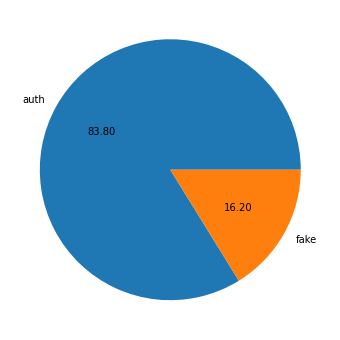

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(data['class'].value_counts(), labels=['auth','fake'], autopct='%0.2f')
plt.show()

In [ ]:
!pip install bltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bltk: filename=bltk-1.2-py3-none-any.whl size=17432537 sha256=2dba308f8724b4f1dc0cad6f9afceb12b9642b5bcddb5d3e2dd1f3bc26dd88ca
  Stored in directory: /root/.cache/pip/wheels/40/95/27/80bfbeb60364f00de71ea3570cb9b76ab17c8e8ab944c2d81b
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=8efafd11a6302416dbd2d1b90b92b2a1af54479748cb4177164708c6b3461e7e
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built bltk sklearn


In [ ]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)
from bltk.langtools import Tokenizer
from bltk.langtools import remove_stopwords
tokenizer = Tokenizer()




In [ ]:
def bangla_tokenizer(content):
    bangla_words = tokenizer.word_tokenizer(content)
    return bangla_words

In [ ]:
data["content"] = data["content"].apply(bangla_tokenizer)

In [ ]:
data.head(10)

,content,class
0,"[মুরগির, হামলায়, শেয়াল, নিহত, বাংলায়, একটা, প্...",0
1,"[বিটিভিতে, যেবার, আমি, ইন্টারভিউ, দিতে, গেলাম,...",0
2,"[বিদেশ, থেকে, উন্নতমানের, বিরোধীদল, আমদানি, কর...",0
3,"[অবসর, নেয়ার, ঘোষণা, দিলেন, মেসি, , !, রাশিয়া,...",0
4,"[মাদারফাকার, নহে, ,, ব্রাদারফাকার, :, সাকা, |,...",0
5,"[বিয়ের, পিড়িতে, বসছেন, মিয়া, খলিফা, , !, ছে...",0
6,"[জুম্মার, নামাজে, সবচেয়ে, বেশি, মসজিদে, যায়,...",0
7,"[প্রধানমন্ত্রীর, প্রশ্ন, :, আমনে, আমাত্তে, বড়,...",0
8,"[জানেন, শিব, ঠাকুরের, বাবা, কে, , ?, জেনে, নিন...",0
9,"[মেডামের, দুয়ায়, সমস্যা, আছে, :, মিছবাউল, |, দ...",0


# **Detokenize & Remove Stopwords**

In [ ]:
from bltk.langtools import remove_stopwords
from nltk import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
def drop_stopwords(content):
    bangla_words = (remove_stopwords(content, level='hard'))
    content = TreebankWordDetokenizer().detokenize(bangla_words)
    return content

In [ ]:
data["content"] = data["content"].apply(drop_stopwords)

In [ ]:
data.head(10)

,content,class
0,মুরগির হামলায় শেয়াল নিহত বাংলায় প্রবাদ শেয়ালের...,0
1,বিটিভিতে যেবার ইন্টারভিউ গেলাম BTV লোকজন আসছে ...,0
2,বিদেশ উন্নতমানের বিরোধীদল আমদানি পরামর্শ অনলাই...,0
3,অবসর নেয়ার ঘোষণা মেসি রাশিয়া বিশ্বকাপ নকআউট প...,0
4,মাদারফাকার নহে ব্রাদারফাকার সাকা | দৈনিক মতিকণ...,0
5,বিয়ের পিড়িতে বসছেন মিয়া খলিফা ছেলে কুমিল্ল...,0
6,জুম্মার নামাজে সবচেয়ে মসজিদে নোয়াখালীর ছেলের...,0
7,প্রধানমন্ত্রীর প্রশ্ন আমনে আমাত্তে বড় দেশপ্রেম...,0
8,জানেন শিব ঠাকুরের বাবা জেনে নিন তাহলে.. তেত্র...,0
9,মেডামের দুয়ায় সমস্যা মিছবাউল | দৈনিক মতিকণ্ঠ ক...,0


# **Unwanted Information Removal (Puncuations, Hyperlinks)**

In [ ]:
import string
def drop_punctuation(text):
  text = re.sub('\[.*?\]','',text)
  text = re.sub('https?://\S+|www\.S+', '',text)
  text = re.sub('\n', '',text)
  text_new = text.translate(str.maketrans('', '', string.punctuation))
  return text_new

In [ ]:
data["content"] = data["content"].apply(drop_punctuation)
data.head(10)

,content,class
0,মুরগির হামলায় শেয়াল নিহত বাংলায় প্রবাদ শেয়ালের...,0
1,বিটিভিতে যেবার ইন্টারভিউ গেলাম BTV লোকজন আসছে ...,0
2,বিদেশ উন্নতমানের বিরোধীদল আমদানি পরামর্শ অনলাই...,0
3,অবসর নেয়ার ঘোষণা মেসি রাশিয়া বিশ্বকাপ নকআউট প...,0
4,মাদারফাকার নহে ব্রাদারফাকার সাকা দৈনিক মতিকণ্...,0
5,বিয়ের পিড়িতে বসছেন মিয়া খলিফা ছেলে কুমিল্ল...,0
6,জুম্মার নামাজে সবচেয়ে মসজিদে নোয়াখালীর ছেলের...,0
7,প্রধানমন্ত্রীর প্রশ্ন আমনে আমাত্তে বড় দেশপ্রেম...,0
8,জানেন শিব ঠাকুরের বাবা জেনে নিন তাহলে তেত্রিশ...,0
9,মেডামের দুয়ায় সমস্যা মিছবাউল দৈনিক মতিকণ্ঠ ক্...,0


In [ ]:
bangla_punctuations_and_numbers = ['-','।','~','^','@',',','(',')', '৳', '৺', 'ঀ', 'ঽ', '$', '০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']
def drop_pun(text):
  new_text = ""
  for char in text:
      if char not in bangla_punctuations_and_numbers:
          new_text += char
  return new_text

In [ ]:
data["content"] = data["content"].apply(drop_pun)

In [ ]:
data.head(5)

,content,class
0,মুরগির হামলায় শেয়াল নিহত বাংলায় প্রবাদ শেয়ালের...,0
1,বিটিভিতে যেবার ইন্টারভিউ গেলাম BTV লোকজন আসছে ...,0
2,বিদেশ উন্নতমানের বিরোধীদল আমদানি পরামর্শ অনলাই...,0
3,অবসর নেয়ার ঘোষণা মেসি রাশিয়া বিশ্বকাপ নকআউট প...,0
4,মাদারফাকার নহে ব্রাদারফাকার সাকা দৈনিক মতিকণ্...,0


# **Remove Emoji**

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
    
data["content"] = data["content"].apply(remove_emoji)
data.sample(10)

,content,class
36731,নেইমারের কণ্ঠে অসহায়ত্বের সুর রাশিয়া বিশ্বকাপে...,1
34218,ছোট্ট হাতে নৌকার বৈঠা খায়রুল বাশার আশিক সময়ের...,1
25627,বছরের শিশুকে ধর্ষণের ফেলে রাস্তায় কুমিল্লায় ...,1
31604,আমীর খসরুর আবেদন কার্যতালিকা বাদ দুদকে তলবের ব...,1
7783,শিক্ষার্থীদের অনুরোধে গান গাইলেন প্রতিমন্ত্রী ...,1
4010,বিলেতের বাংলা বইমেলা অপ্রিয় ভাবনা বিলেতে বাংলা...,1
3234,শেষ ল্যাম্পার্ডের এভারটন অধ্যায় ইংলিশ প্রিমিয়া...,1
41887,স্বরূপকাঠিতে বিদ্যুৎস্পৃষ্টে গৃহবধূর মৃত্যু স্...,1
24124,বিমানের ভ্যানের ধাক্কায় নভোএয়ারের প্লেন ক্ষতিগ...,1
36152,হিমায়িত খাবার সংরক্ষণ হিমায়িত ফ্রোজেন খাবারের ...,1


# ***Bangla Stemming***

***Importing Rules***

In [ ]:
mainsuffixrules_file = pd.read_csv ('/content/drive/MyDrive/Datasets/BanglaFakeNews/Rules_Stemming/mainsuffixrules.csv')
mainsuffixrules = mainsuffixrules_file['Rules'].astype(str).tolist()

execeptionlist_file = pd.read_csv ('/content/drive/MyDrive/Datasets/BanglaFakeNews/Rules_Stemming/execeptionlist.csv')
execeptionlist = execeptionlist_file['Rules'].astype(str).tolist()

manual_list_file = pd.read_csv ('/content/drive/MyDrive/Datasets/BanglaFakeNews/Rules_Stemming/manual_list.csv')
manual_list = manual_list_file['Rules'].astype(str).tolist()

***Algorithm***

In [ ]:
def Auto_modify(word):
  mainword = word
  oldword = word
  newword =""
  wordlen = len(word)
  
  for i in range(len(mainsuffixrules)):
    this_list = mainsuffixrules[i]
    con_1 = this_list
    con_1_len = len(this_list)
    c=0
    if(con_1_len>=wordlen):
      continue
    for k in reversed(range(con_1_len)):
      if(word[(wordlen-1)-c] == con_1[(con_1_len-1)-c]):
        c=c+1
      else:
        break
      if(c == con_1_len):
        break
    if(con_1_len==c):
        newword = oldword[:wordlen-con_1_len]
        check = 0
        return newword
        break


def Manual_modify(word):
  mainword = word
  oldword = word
  newword =""
  wordlen = len(word)
  for i in range(len(manual_list)):
    check = 1
    if ( check != 1):
        break
    this_list = manual_list[i]
    my_list = this_list.split('-')
    con_1 = my_list[0]
    con_2 = my_list[1]
    con_1_len = len(con_1)
    con_2_len = len(con_2)
    c=0
    if(con_1_len>=wordlen):
      continue
    for k in reversed(range(con_1_len)):
      if(word[(wordlen-1)-c] == con_1[(con_1_len-1)-c]):
        c=c+1
      else:
        break
      if(c == con_1_len):
        break
    if(con_1_len==c):
      newword = oldword[:wordlen-con_1_len]
      newword = newword+con_2 
      check = 0 
      return newword
      break

def CheckIF(word):
  check = 0
  for i in range(len(execeptionlist)):
    exct = execeptionlist[i]
    if(exct == word):
      check = 1
  return check   



def BLStemmer(String):
  splits = String.split()
  text = ""
  for word in splits:
    ec = 0
    manual_check = 0
    ec = CheckIF(word)
    if (ec == 1):
      word = word
    if (Manual_modify(word)!=None and ec == 0 and manual_check == 0):
      word = Manual_modify(word)
      
    elif(Auto_modify(word)!=None and ec == 0 and manual_check == 0):
      word = Auto_modify(word)
    if(len(word)<2):
      word=''
    text = text+word+" "
  after_strip = text.strip()
  result = " ".join(after_strip.split())
  String = result
  return String


In [ ]:
data["content"] = data["content"].apply(BLStemmer)

In [ ]:
data["content"].head(10)

0    মুরগির হামলায় শেয়াল নিহত বাংলায় প্রবাদ শেয়াল ম...
1    বিটিভিতে যেবার ইন্টারভিউ গে BTV লোকজন আসছে ইন্...
2    বিদেশ উন্নতমান বিরোধী আমদানি পরামর্শ অনলাইন রা...
3    অবসর নেয়া ঘোষণা মেসি রাশিয়া বিশ্বকাপ নকআউট পর্...
4    মাদারফাকা নহ ব্রাদারফাকা সাকা দৈনিক মতিকণ্ঠ নি...
5    বিয় পিড়িতে বস মিয়া খলিফা ছেলে কুমিল্লার বিয...
6    জুম্মার নামাজে সবচেয়ে মসজিদে নোয়াখাল ছেলেরা ...
7    প্রধানমন্ত্র প্রশ্ন আমন আমাত্তে বড় দেশপ্রেমিক ...
8    জানে শিব ঠাকুর বাবা জেন নিন তাহলে তেত্রিশ দেবত...
9    মেডাম দুয়ায় সমস্যা মিছবাউল দৈনিক মতিকণ্ঠ ক্রীড়...
Name: content, dtype: object

---Stemming End---

In [ ]:
data.sample(10)

,content,class
9504,ব্রেকিং রাষ্ট্রপতি ট্রাম্প কমি সাক্ষ্য একদিন এ...,0
28907,চট্টগ্রাম বন্দর বহির্নোঙর লাইটার জাহাজডুবি না...,1
45221,নেপাল হারিয় সাফ চ্যাম্পিয়ন বাংলাদেশ অবশেষে ভুট...,1
7941,হাজীগঞ্জে বছর ডা রফিক লাশ উত্তোলন চাঁদপুর হাজী...,1
43670,ভুটান বাংলাদেশ মেয়ে শিরোপার লড় সন্ধ্যায় সাফ অন...,1
47700,বিএনপি কামাল হোসেন নেতা মানতে রাজি বাংলাদেশ রা...,1
12109,ক্রিকেট খেল সবচেয় বেশী ভ্রমণ গেইল আবুধাবিতে ম্...,1
9224,সিএনএন বাসিন্দা বর্ণবাদী কীভাব ওবামা আমেরিকায়...,0
16838,বাম গণতান্ত্রিক জো অসন্তোষ জাতীয় ঐক্যপ্রক্রিয়া...,1
41733,সহজে তাহাজ্জু অভ্যাস গড়ার উপায় দ্য রিপোর্ট ডেস...,1


In [ ]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
empty_real_index = [index for index,text in enumerate(data.content.tolist()) if str(text).strip()==""]
data.iloc[empty_real_index]
data = data.drop(empty_real_index,axis=0)
data.isnull().sum()
data=data.dropna()


In [ ]:
data.sample(10)

,content,class
42319,কারা ফটক কাঁটাতার বেড়া চলাচল নাজিম উদ্দিন রোডে...,1
25337,আন্তর্জাতিক তথ্য অধিকা দিবস সেপ্টেম্বর আন্তর্জ...,1
6353,নারায়ণগঞ্জে ধর্ষণ কিশোরী হত্যায় মৃত্যুদণ্ড নার...,1
34458,অল্প বেঁচে গে এমপি মজিদ খান হবিগঞ্জে পিকআপ চাপ...,1
15724,জেলায় ডিসি সেপ্টেম্বর একাদশ জাতীয় সংসদ নির্বাচ...,1
48497,ব্রিটিশ কাউন্সিলে দেবী সিনেমা মুক্তির প্রচারণা...,1
45538,বিএনপির মামলা ধরপাকড় সামন জাতীয় নির্বাচন আন্দো...,1
45747,সাবেক চরমপন্থী নেতা হত্যা রাজবাড়ী প্রতিনিধি রা...,1
28161,দল কর্মী সমাবেশ আওয়ামী লীগ নেতৃত্বাধীন ক্ষমতাস...,1
6895,কর্ম রেসঅবসেসড ডেট্রয়েট ফ্রি প্রেস সম্পাদকীয়...,0


In [ ]:
data.to_csv('/content/drive/MyDrive/Datasets/BanglaFakeNews/BanFakeNews_Preprocessed_complete_all.csv')

In [ ]:
data = pd.read_csv ('/content/drive/MyDrive/Datasets/BanglaFakeNews/BanFakeNews_Preprocessed_complete_all.csv')
data = data[['content', 'class']]

In [ ]:
data.shape

(63426, 2)

In [ ]:
data.sample(10)

,content,class
12610,ভরা মৌসুম কক্সবাজার পর্যটক খরা কক্সবাজার পর্যট...,1
37165,মেহেদি ফিরলে স্বপ্নরা ফিরব উচ্চমাধ্যমিক গন্ডি ...,1
24179,কানাডায় ঘূর্ণিঝড় আহত ডজন মানুষ কানাডায় ঘূর্ণিঝ...,1
33385,রোহিঙ্গা ওপর নৃশংসতা ‘গণহত্যা’ ঘোষণা করুন রাখা...,1
43264,ধর্ষণ অভিযোগ রোনালদোর মামলা ধর্ষণ অভিযোগ ক্রিস...,1
44082,নড়াইলে রোপণ লাখ বৃক্ষ টিকিয় রাখতে পুনঃবনায়ন নড়...,1
37707,বাংলাদেশ দেশ সংবাদ মাধ্যম স্বাধীনতা চ্যালেঞ্জ ...,1
22943,ফুলবাড়ীতে হোটেল যুবক ঝুলন্ত লাশ উদ্ধার কুড়িগ্র...,1
59710,পাকিস্তানি ক্রিকেটার জেরিন খান প্রেম গুঞ্জন ক্...,1
32538,মুশফিকমিথুন জুটিতে স্বস্তিতে বাংলাদেশ আরো সংবা...,1


# **Wordcloud**

In [ ]:
!wget https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip

--2023-03-18 13:23:43--  https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip
Resolving www.easynepalityping.com (www.easynepalityping.com)... 104.21.11.66, 172.67.165.83, 2606:4700:3035::ac43:a553, ...
Connecting to www.easynepalityping.com (www.easynepalityping.com)|104.21.11.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317905 (310K) [application/zip]
Saving to: ‘06-nikosh-bangla-font.zip’

06-nikosh-bangla-fo 100%[===================>] 310.45K  --.-KB/s    in 0.03s   

2023-03-18 13:23:44 (8.85 MB/s) - ‘06-nikosh-bangla-font.zip’ saved [317905/317905]



In [ ]:
!unzip 06-nikosh-bangla-font.zip

Archive:  06-nikosh-bangla-font.zip
  inflating: Nikosh.ttf              


In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_world(text):

    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='black', 
                    font_path="Nikosh.ttf",
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

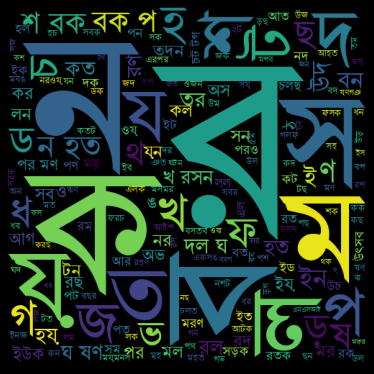

In [ ]:
s= " ".join(auth.headline[:100])
plot_world(s)

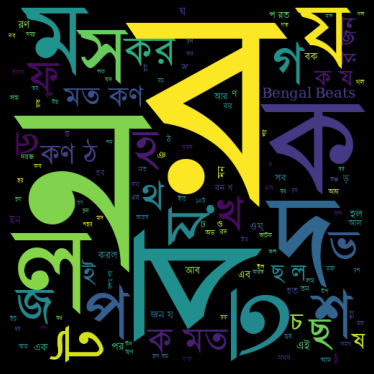

In [ ]:
s= " ".join(fake.headline[:100])
plot_world(s)

# Randomize Data

In [ ]:
data = data.sample(frac=1)

In [ ]:
Xm = data["content"]
ym = data["class"]

In [ ]:
Xm_train, Xm_test, ym_train, ym_test=train_test_split(Xm,ym,test_size=.20)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectrorization = TfidfVectorizer()
xv_train = vectrorization.fit_transform(Xm_train)
xv_test = vectrorization.transform(Xm_test)

# **Machine Learning Models**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
#-------------------------------------Models to be trained----------------------------------------------------------#
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost
import sklearn

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, ym_train)

LogisticRegression()

In [ ]:
LR.score(xv_test, ym_test)

0.9762730569131326

In [ ]:
pred_LR = LR.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_LR))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2097
           1       0.98      1.00      0.99     10589

    accuracy                           0.98     12686
   macro avg       0.98      0.94      0.96     12686
weighted avg       0.98      0.98      0.98     12686



In [ ]:
lr_acc = accuracy_score(ym_test,pred_LR)
lr = pd.DataFrame([lr_acc], columns = ['Logistic Regression'])

In [ ]:
score_lr = round(accuracy_score(pred_LR,ym_test)*100,2)

[[ 1833   264]
 [   37 10552]]


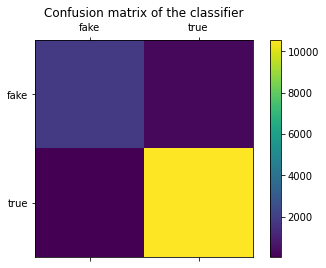

In [ ]:
labels = ['fake', 'true']
cm = confusion_matrix(ym_test, pred_LR)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()

[0,0] is fake-fake, [1,1] is true-true
[1,0] -> 245 value is actually true but predicted as fake news and [0,1]-. 6 values are fake news but predicted as true news is Error. 

Yellow: 12176 values ​​predicted true and actually its true.
Blue: 66 values ​​predicted as fake news and actually its fake news.


<Axes: >

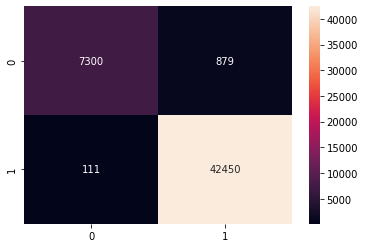

In [ ]:
cm = sklearn.metrics.confusion_matrix(ym_train, LR.predict(xv_train))
sns.heatmap(cm, annot=True, fmt="d")

**Support Vector Machine**

In [ ]:
from sklearn import model_selection, svm

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(xv_train,ym_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
SVM.score(xv_test, ym_test)

0.9809238530663724

In [ ]:
pred_SVM = SVM.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_SVM))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2097
           1       0.98      1.00      0.99     10589

    accuracy                           0.98     12686
   macro avg       0.98      0.95      0.96     12686
weighted avg       0.98      0.98      0.98     12686



In [ ]:
svm_acc = accuracy_score(ym_test,pred_SVM)
svm = pd.DataFrame([svm_acc], columns = ['Support Vector Machine'])

In [ ]:
score_svm = round(accuracy_score(pred_SVM,ym_test)*100,2)

[[ 1879   218]
 [   24 10565]]


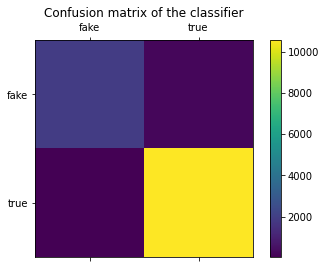

In [ ]:
labels = ['fake', 'true']
cm = confusion_matrix(ym_test, pred_SVM)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()

<Axes: >

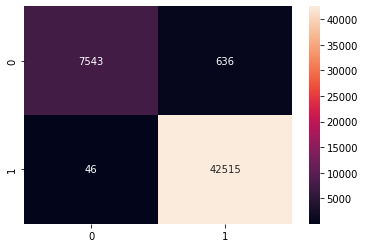

In [ ]:
cm = sklearn.metrics.confusion_matrix(ym_train, SVM.predict(xv_train))
sns.heatmap(cm, annot=True, fmt="d")

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=50, min_samples_split=2,random_state=45)
DT.fit(xv_train, ym_train)

DecisionTreeClassifier(max_depth=50, random_state=45)

In [ ]:
DT.score(xv_test, ym_test)

0.9642125177360871

In [ ]:
pred_DT = DT.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_DT))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2097
           1       0.97      0.98      0.98     10589

    accuracy                           0.96     12686
   macro avg       0.94      0.93      0.93     12686
weighted avg       0.96      0.96      0.96     12686



In [ ]:
dt_acc = accuracy_score(ym_test,pred_DT)
dt = pd.DataFrame([dt_acc], columns = ['Decision Tree'])

In [ ]:
score_dt = round(accuracy_score(pred_DT,ym_test)*100,2)

[[ 1828   269]
 [  185 10404]]


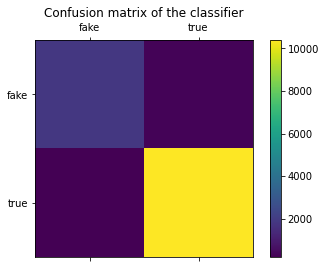

In [ ]:
labels = ['fake', 'true']
cm = confusion_matrix(ym_test, pred_DT)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()

<Axes: >

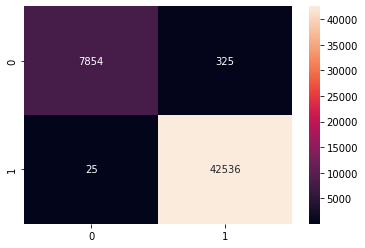

In [ ]:
cm = sklearn.metrics.confusion_matrix(ym_train, DT.predict(xv_train))
sns.heatmap(cm, annot=True, fmt="d")

# **Ensemble Method**

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=200, random_state=20)
RF.fit(xv_train, ym_train)

RandomForestClassifier(n_estimators=200, random_state=20)

In [ ]:
RF.score(xv_test, ym_test)

0.9729623206684535

In [ ]:
pred_RF = RF.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_RF))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      2097
           1       0.97      1.00      0.98     10589

    accuracy                           0.97     12686
   macro avg       0.98      0.92      0.95     12686
weighted avg       0.97      0.97      0.97     12686



In [ ]:
rf_acc = accuracy_score(ym_test,pred_RF)
rf = pd.DataFrame([rf_acc], columns = ['Random Forest'])

In [ ]:
score_rf = round(accuracy_score(pred_RF,ym_test)*100,2)

[[ 1761   336]
 [    7 10582]]


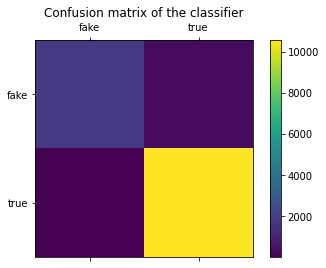

In [ ]:
labels = ['fake', 'true']
cm = confusion_matrix(ym_test, pred_RF)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()

<Axes: >

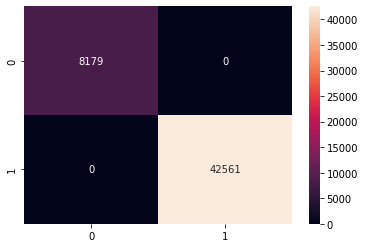

In [ ]:
cm = sklearn.metrics.confusion_matrix(ym_train, RF.predict(xv_train))
sns.heatmap(cm, annot=True, fmt="d")

**Extra Tree Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier(n_estimators=500, random_state=50)
ET.fit(xv_train, ym_train)

ExtraTreesClassifier(n_estimators=500, random_state=50)

In [ ]:
ET.score(xv_test, ym_test)

0.9759577486993536

In [ ]:
pred_ET = ET.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_ET))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2097
           1       0.97      1.00      0.99     10589

    accuracy                           0.98     12686
   macro avg       0.98      0.93      0.95     12686
weighted avg       0.98      0.98      0.98     12686



In [ ]:
et_acc = accuracy_score(ym_test,pred_ET)
et = pd.DataFrame([et_acc], columns = ['ExtraTree'])

In [ ]:
score_et = round(accuracy_score(pred_ET,ym_test)*100,2)

[[ 1802   295]
 [   10 10579]]


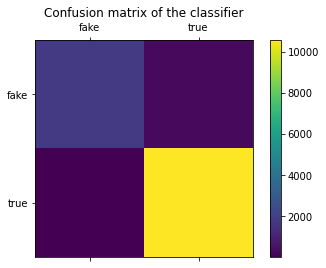

In [ ]:
labels = ['fake', 'true']
cm = confusion_matrix(ym_test, pred_ET)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()

<Axes: >

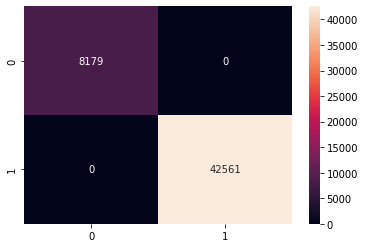

In [ ]:
cm = sklearn.metrics.confusion_matrix(ym_train, ET.predict(xv_train))
sns.heatmap(cm, annot=True, fmt="d")

**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GB = GradientBoostingClassifier(n_estimators=500, random_state=50)
GB.fit(xv_train, ym_train)

GradientBoostingClassifier(n_estimators=500, random_state=50)

In [ ]:
GB.score(xv_test, ym_test)

0.9754847863786852

In [ ]:
pred_GB = GB.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_GB))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2097
           1       0.98      1.00      0.99     10589

    accuracy                           0.98     12686
   macro avg       0.98      0.93      0.95     12686
weighted avg       0.98      0.98      0.97     12686



In [ ]:
gb_acc = accuracy_score(ym_test,pred_GB)
gb = pd.DataFrame([gb_acc], columns = ['Gradient Boosting'])

In [ ]:
score_gb = round(accuracy_score(pred_GB,ym_test)*100,2)

[[ 1833   264]
 [   47 10542]]


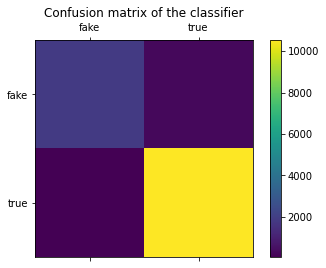

In [ ]:
labels = ['fake', 'true']
cm = confusion_matrix(ym_test, pred_GB)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()

<Axes: >

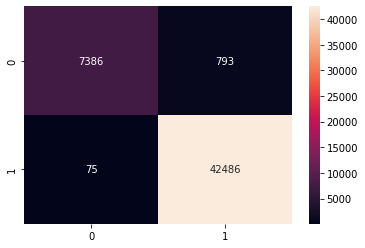

In [ ]:
cm = sklearn.metrics.confusion_matrix(ym_train, GB.predict(xv_train))
sns.heatmap(cm, annot=True, fmt="d")

**Extreme Gradient Boosting Classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XG = XGBClassifier(n_estimators=500, random_state=50)
XG.fit(xv_train, ym_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=50, ...)

In [ ]:
XG.score(xv_test, ym_test)

0.9833674917231594

In [ ]:
pred_XG = XG.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_XG))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2097
           1       0.98      1.00      0.99     10589

    accuracy                           0.98     12686
   macro avg       0.98      0.96      0.97     12686
weighted avg       0.98      0.98      0.98     12686



In [ ]:
xg_acc = accuracy_score(ym_test,pred_XG)
xg = pd.DataFrame([xg_acc], columns = ['XGBoost'])

In [ ]:
score_xg = round(accuracy_score(pred_XG,ym_test)*100,2)

[[ 1925   172]
 [   39 10550]]


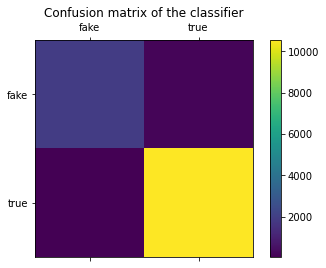

In [ ]:
labels = ['fake', 'true']
cm = confusion_matrix(ym_test, pred_XG)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()

<Axes: >

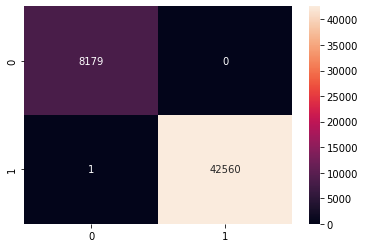

In [ ]:
cm = sklearn.metrics.confusion_matrix(ym_train, XG.predict(xv_train))
sns.heatmap(cm, annot=True, fmt="d")

**Multinomial Naive Bayes with RandomizedSearchCV**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
alpha = np.arange(0, 1, 0.001)
fit_prior = [True, False]

params = {
    'alpha' : alpha,
    'fit_prior' : fit_prior
}

NB_R = RandomizedSearchCV(
    estimator = MultinomialNB(),
    param_distributions = params,
    n_iter = 100,
    cv = 3,
    n_jobs = -1,
    random_state = 5
)
NB_R.fit(xv_train, ym_train)

RandomizedSearchCV(cv=3, estimator=MultinomialNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.04...
       0.945, 0.946, 0.947, 0.948, 0.949, 0.95 , 0.951, 0.952, 0.953,
       0.954, 0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962,
       0.963, 0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971,
       0.972, 0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 ,
       0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989,
       0.99 , 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998,
       0.999]),
                                        'fit_prior': [True, False]},
                   random_state=5)

In [ ]:
NB_R.best_params_

{'fit_prior': True, 'alpha': 0.006}

In [ ]:
NB_R.score(xv_test, ym_test)

0.9742235535235693

In [ ]:
pred_NB_R = NB_R.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_NB_R))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2097
           1       0.97      1.00      0.98     10589

    accuracy                           0.97     12686
   macro avg       0.98      0.93      0.95     12686
weighted avg       0.97      0.97      0.97     12686



In [ ]:

mnb_acc = accuracy_score(ym_test,pred_NB_R)
nb_r = pd.DataFrame([mnb_acc], columns = ['NB-RandomizedSearchCV'])


In [ ]:
score_nb_r = round(accuracy_score(pred_NB_R,ym_test)*100,2)

[[ 1794   303]
 [   24 10565]]


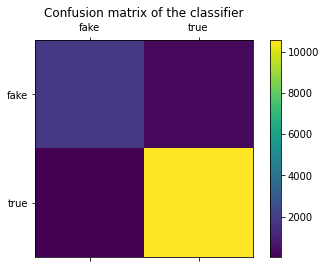

In [ ]:
labels = ['fake', 'true']
cm = confusion_matrix(ym_test, pred_NB_R)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()

<Axes: >

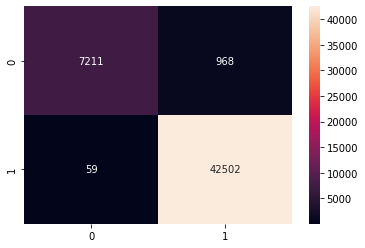

In [ ]:
cm = sklearn.metrics.confusion_matrix(ym_train, NB_R.predict(xv_train))
sns.heatmap(cm, annot=True, fmt="d")

***Ensemble with Estimators***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
#-------------------------------------Models to be trained----------------------------------------------------------#
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

import xgboost

In [ ]:
estimators = [
    ('svm', SVM),
    ('lr', LR),
    ('et', ET),
    ('gb', GB),
    ('rf',RF),
    ('dt',DT),
    ('xg', XG),
    ('nb_r', NB_R)
]


In [ ]:
estimators

[('svm', SVC(gamma='auto', kernel='linear')),
 ('lr', LogisticRegression()),
 ('et', ExtraTreesClassifier(n_estimators=500, random_state=50)),
 ('gb', GradientBoostingClassifier(n_estimators=500, random_state=50)),
 ('rf', RandomForestClassifier(n_estimators=200, random_state=20)),
 ('dt', DecisionTreeClassifier(max_depth=50, random_state=45)),
 ('xg', XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,


**Hard Voting Classifier**

In [ ]:
HVC_E = VotingClassifier(
    estimators = estimators,
    voting='hard', 
    n_jobs=-1,
    flatten_transform=True, 
    verbose=1).fit(xv_train, ym_train)

HVC_E.score(xv_train, ym_train)

0.9974182104848246

In [ ]:
HVC_E.score(xv_test, ym_test)

0.9810815071732618

In [ ]:
pred_HVC_E = HVC_E.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_HVC_E))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2097
           1       0.98      1.00      0.99     10589

    accuracy                           0.98     12686
   macro avg       0.99      0.94      0.96     12686
weighted avg       0.98      0.98      0.98     12686



In [ ]:
hvc_e_acc = accuracy_score(ym_test,pred_HVC_E)
hvc_e = pd.DataFrame([hvc_e_acc], columns = ['Hard Voting'])

In [ ]:
score_hvc_e = round(accuracy_score(pred_HVC_E,ym_test)*100,2)

[[ 1868   229]
 [   11 10578]]


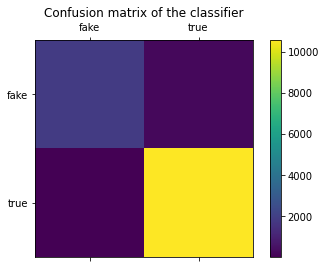

In [ ]:
labels = ['fake', 'true']
cm = confusion_matrix(ym_test, pred_HVC_E)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()

<Axes: >

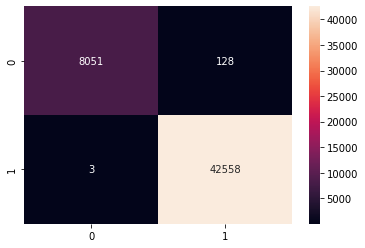

In [ ]:
cm = sklearn.metrics.confusion_matrix(ym_train, HVC_E.predict(xv_train))
sns.heatmap(cm, annot=True, fmt="d")

**Stacking Classifier (XGBOOST-ENSEMBLE)**

In [ ]:
#num_class= 10,  learning_rate= 0.1, subsample= 0.8, colsample_bytree= 0.8, 

In [ ]:
xgc = xgboost.XGBClassifier(n_estimators=200, random_state=20)

SC_XG = StackingClassifier(
    estimators=estimators,
    final_estimator=xgc,
    n_jobs = -1,
    verbose = 1
)

SC_XG.fit(xv_train, ym_train)


StackingClassifier(estimators=[('svm', SVC(gamma='auto', kernel='linear')),
                               ('lr', LogisticRegression()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=500,
                                                     random_state=50)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=500,
                                                           random_state=50)),
                               ('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=20)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=50,
                                                       random_state=...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=200, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=20, ...),
                   n_jobs=-1, verbose=1)

In [ ]:
SC_XG.score(xv_test, ym_test)

0.9858899574333911

In [ ]:
pred_SC_XG = SC_XG.predict(xv_test)

In [ ]:
print(classification_report(ym_test, pred_SC_XG))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2097
           1       0.99      1.00      0.99     10589

    accuracy                           0.99     12686
   macro avg       0.98      0.97      0.97     12686
weighted avg       0.99      0.99      0.99     12686



In [ ]:
sc_xg_acc = accuracy_score(ym_test,pred_SC_XG)
sc_xg = pd.DataFrame([sc_xg_acc], columns = ['STACK-XGBOOST'])


In [ ]:
score_sc_xg = round(accuracy_score(pred_SC_XG,ym_test)*100,2)

[[ 1962   135]
 [   44 10545]]


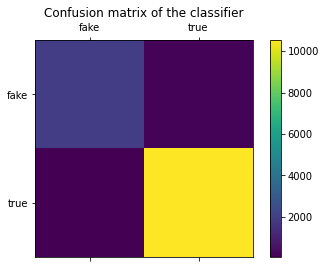

In [ ]:
labels = ['fake', 'true']
cm = confusion_matrix(ym_test, pred_SC_XG)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.show()

<Axes: >

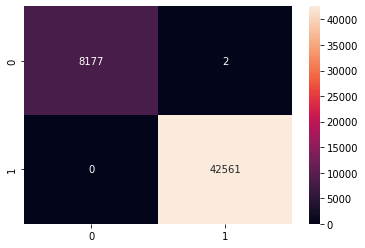

In [ ]:
cm = sklearn.metrics.confusion_matrix(ym_train, SC_XG.predict(xv_train))
sns.heatmap(cm, annot=True, fmt="d")

# **Total Estimation Result**

In [ ]:
model_comp = pd.concat([svm,lr,et,gb,rf,dt,xg,nb_r,hvc_e,sc_xg], axis = 1)
model_comp

,Support Vector Machine,Logistic Regression,ExtraTree,Gradient Boosting,Random Forest,Decision Tree,XGBoost,NB-RandomizedSearchCV,Hard Voting,STACK-XGBOOST
0,0.980924,0.976273,0.975958,0.975485,0.972962,0.964213,0.983367,0.974224,0.981082,0.98589


# **OUTPUT**

Text(0, 0.5, 'Accuracy score')

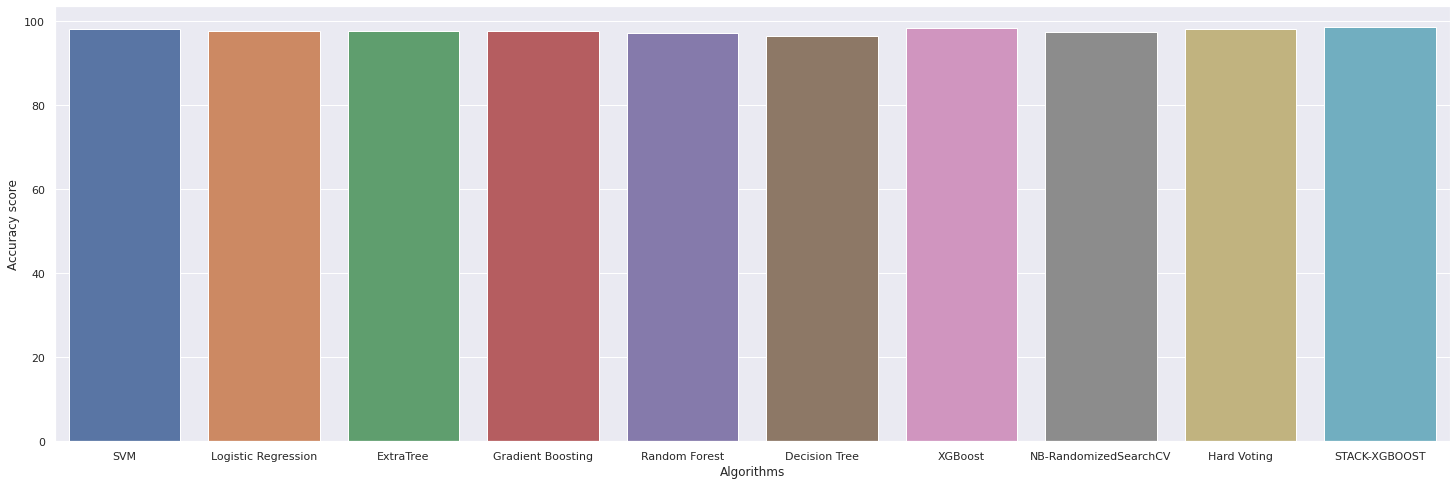

In [ ]:
scores = [score_svm,score_lr,score_et,score_gb,score_rf,score_dt,score_xg,score_nb_r,score_hvc_e,score_sc_xg]
algorithms = ["SVM","Logistic Regression","ExtraTree","Gradient Boosting","Random Forest","Decision Tree","XGBoost", "NB-RandomizedSearchCV", "Hard Voting", "STACK-XGBOOST" ] 
sns.set(rc={'figure.figsize':(25,8)})
sns.barplot(x=algorithms, y=scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")



Text(0, 0.5, 'Accuracy score')

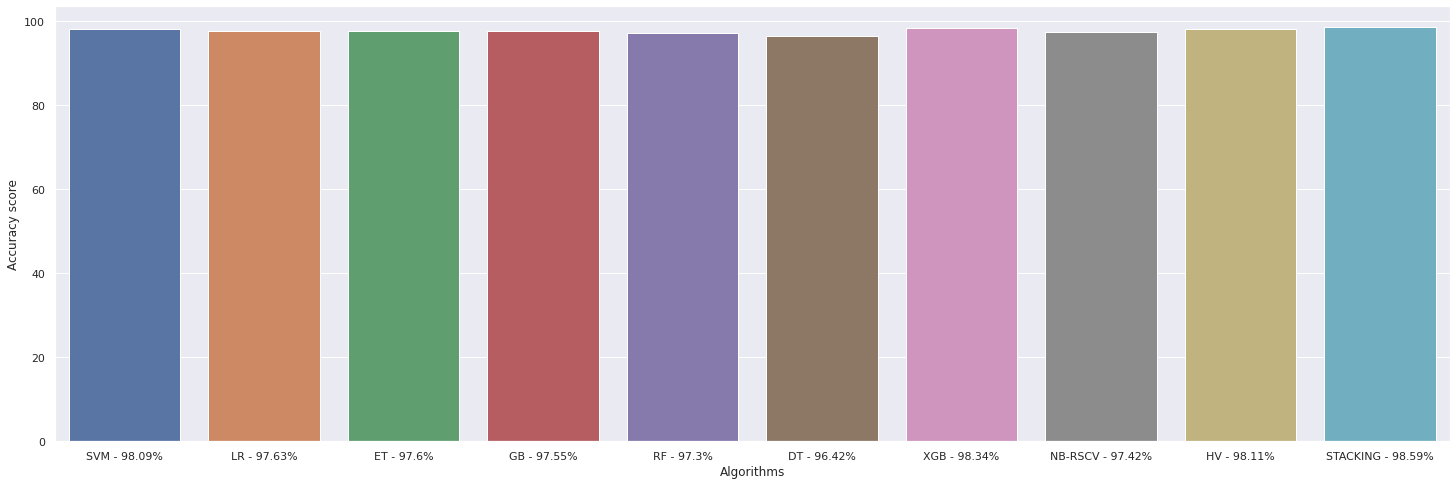

In [ ]:
al_svm = "SVM - "+str(score_svm)+"%"
al_lr = "LR - "+str(score_lr)+"%"
al_et = "ET - "+str(score_et)+"%"
al_gb = "GB - "+str(score_gb)+"%"
al_rf = "RF - "+str(score_rf)+"%"
al_dt = "DT - "+str(score_dt)+"%"
al_xg = "XGB - "+str(score_xg)+"%"
al_nb_r = "NB-RSCV - "+str(score_nb_r)+"%"
al_hvc_e = "HV - "+str(score_hvc_e)+"%"
al_sc_xg = "STACKING - "+str(score_sc_xg)+"%"

scores2 = [score_svm,score_lr,score_et,score_gb,score_rf,score_dt,score_xg,score_nb_r,score_hvc_e,score_sc_xg]
algorithms = [al_svm,al_lr,al_et,al_gb,al_rf,al_dt,al_xg,al_nb_r,al_hvc_e,al_sc_xg] 
sns.set(rc={'figure.figsize':(25,8)})
sns.barplot(x=algorithms, y=scores2)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

